## Matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

In [ ]:
path = kagglehub.dataset_download("tarunpaparaju/apple-aapl-historical-stock-data")

print("Path to dataset files:", path)

100%|██████████| 49.5k/49.5k [00:00<00:00, 36.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tarunpaparaju/apple-aapl-historical-stock-data/versions/1


In [ ]:
import pandas as pd
apple_stock = pd.read_csv(path + '/HistoricalQuotes.csv', index_col='Date', parse_dates=['Date'])

In [ ]:
apple_stock.columns

Index([' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [ ]:
apple_stock.drop(columns=[' Volume'], inplace=True)

In [ ]:
apple_stock.columns

Index([' Close/Last', ' Open', ' High', ' Low'], dtype='object')

In [ ]:
apple_stock

,Close/Last,Open,High,Low
Date,,,,
2020-02-28,$273.36,$257.26,$278.41,$256.37
2020-02-27,$273.52,$281.1,$286,$272.96
2020-02-26,$292.65,$286.53,$297.88,$286.5
2020-02-25,$288.08,$300.95,$302.53,$286.13
2020-02-24,$298.18,$297.26,$304.18,$289.23
...,...,...,...,...
2010-03-05,$31.2786,$30.7057,$31.3857,$30.6614
2010-03-04,$30.1014,$29.8971,$30.1314,$29.8043
2010-03-03,$29.9043,$29.8486,$29.9814,$29.7057


In [ ]:
apple_stock = apple_stock.apply(lambda x : x.str.replace('$', ''))

In [ ]:
apple_stock

,Close/Last,Open,High,Low
Date,,,,
2020-02-28,273.36,257.26,278.41,256.37
2020-02-27,273.52,281.1,286,272.96
2020-02-26,292.65,286.53,297.88,286.5
2020-02-25,288.08,300.95,302.53,286.13
2020-02-24,298.18,297.26,304.18,289.23
...,...,...,...,...
2010-03-05,31.2786,30.7057,31.3857,30.6614
2010-03-04,30.1014,29.8971,30.1314,29.8043
2010-03-03,29.9043,29.8486,29.9814,29.7057


In [ ]:
apple_stock.plot()

TypeError: no numeric data to plot

In [ ]:
apple_stock = apple_stock.astype('float64') ## Reminder, verificati mereu tipul e data

In [ ]:
apple_stock.dtypes

,0
Close/Last,float64
Open,float64
High,float64
Low,float64


## Line plots

<Axes: xlabel='Date'>

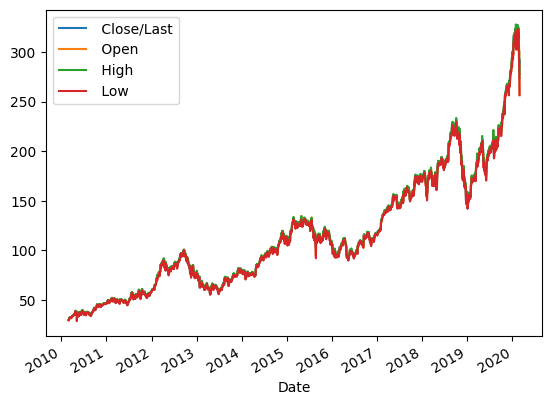

In [ ]:
apple_stock.plot()

<Axes: xlabel='Date'>

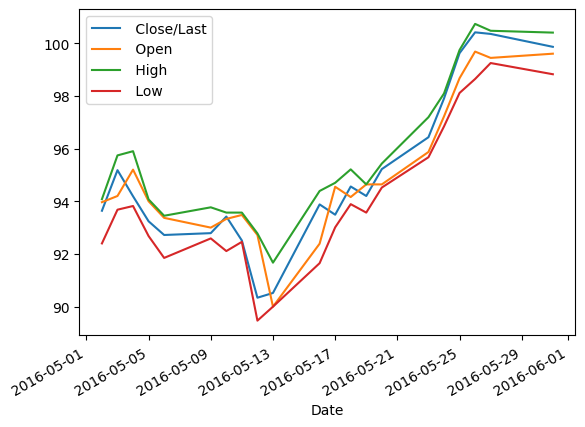

In [ ]:
apple_stock.loc['2016-05'].plot()

<Axes: xlabel='Date'>

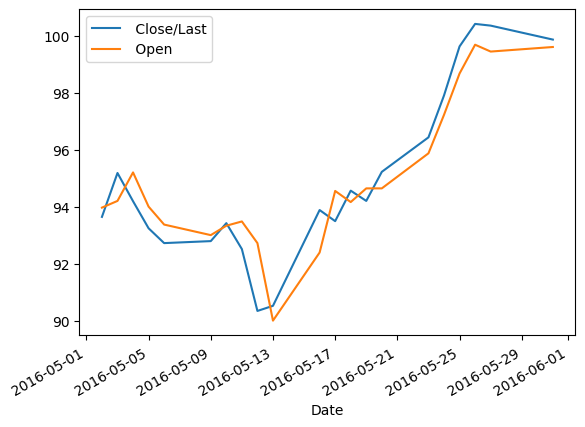

In [ ]:
apple_stock.loc['2016-05'].plot(y=[' Close/Last', ' Open'])

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

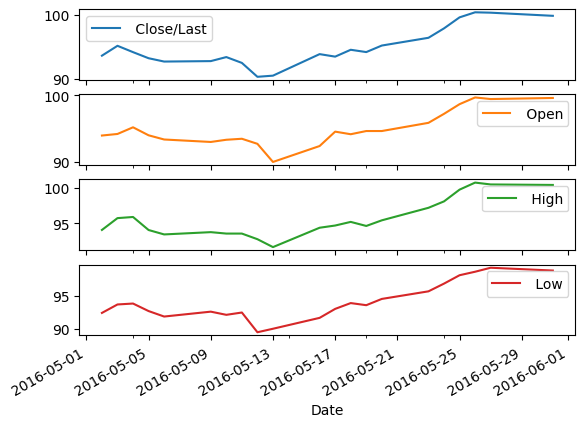

In [ ]:
apple_stock.loc['2016-05'].plot(subplots=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

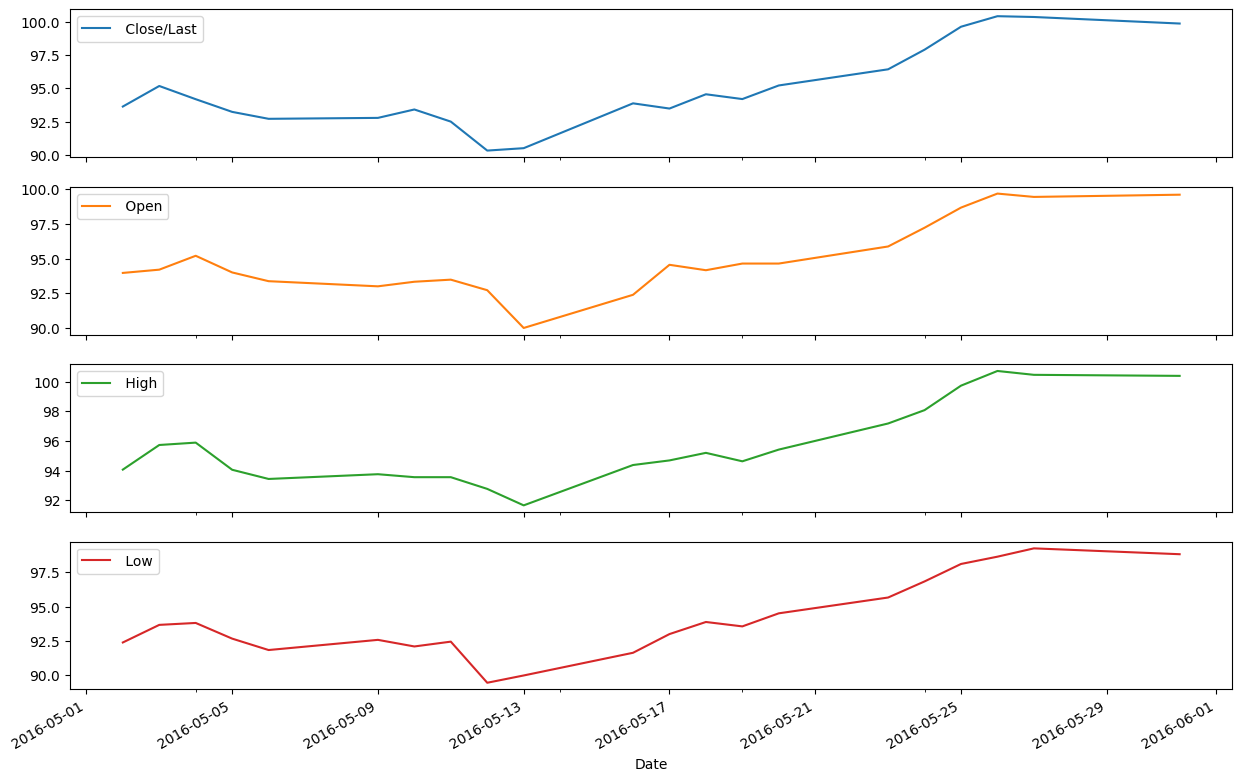

In [ ]:
apple_stock.loc['2016-05'].plot(subplots=True, figsize=(15, 10))

Text(0.5, 1.0, 'Apple stocks')

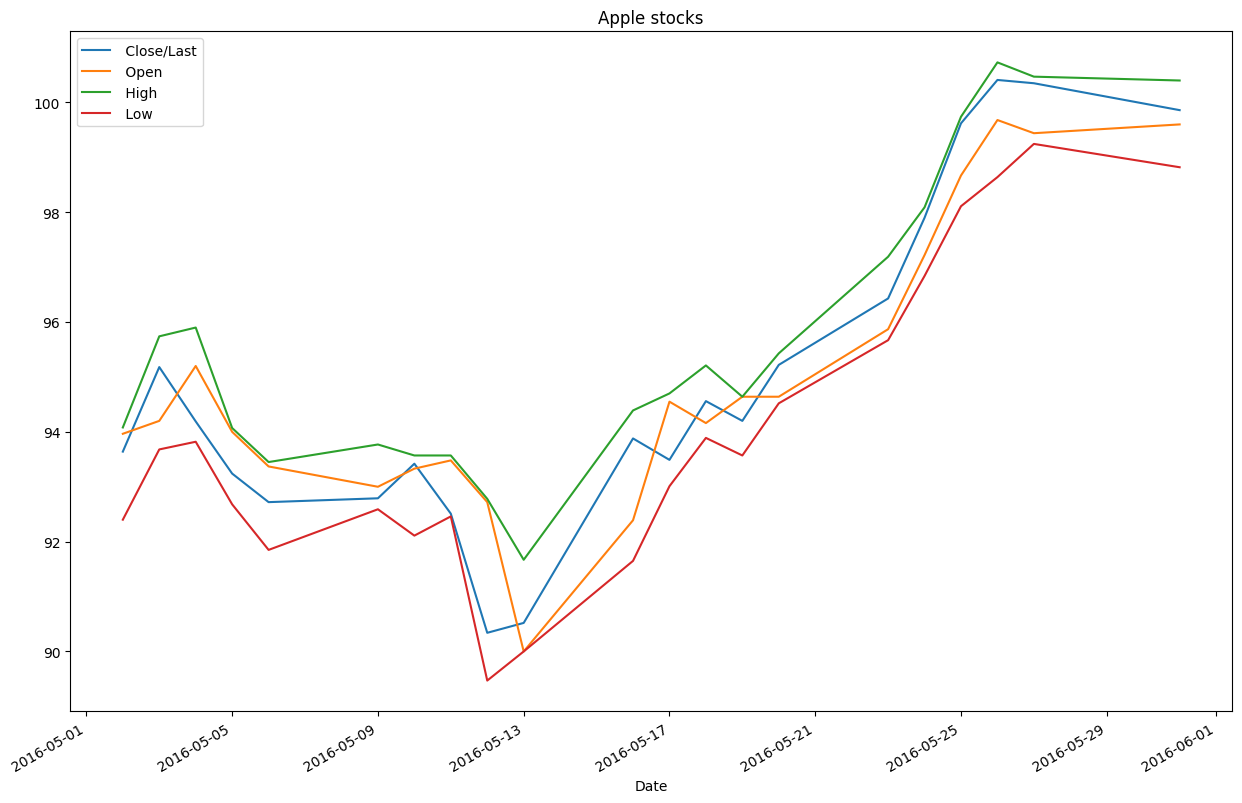

In [ ]:
apple_stock.loc['2016-05'].plot(figsize=(15, 10))
plt.title('Apple stocks')

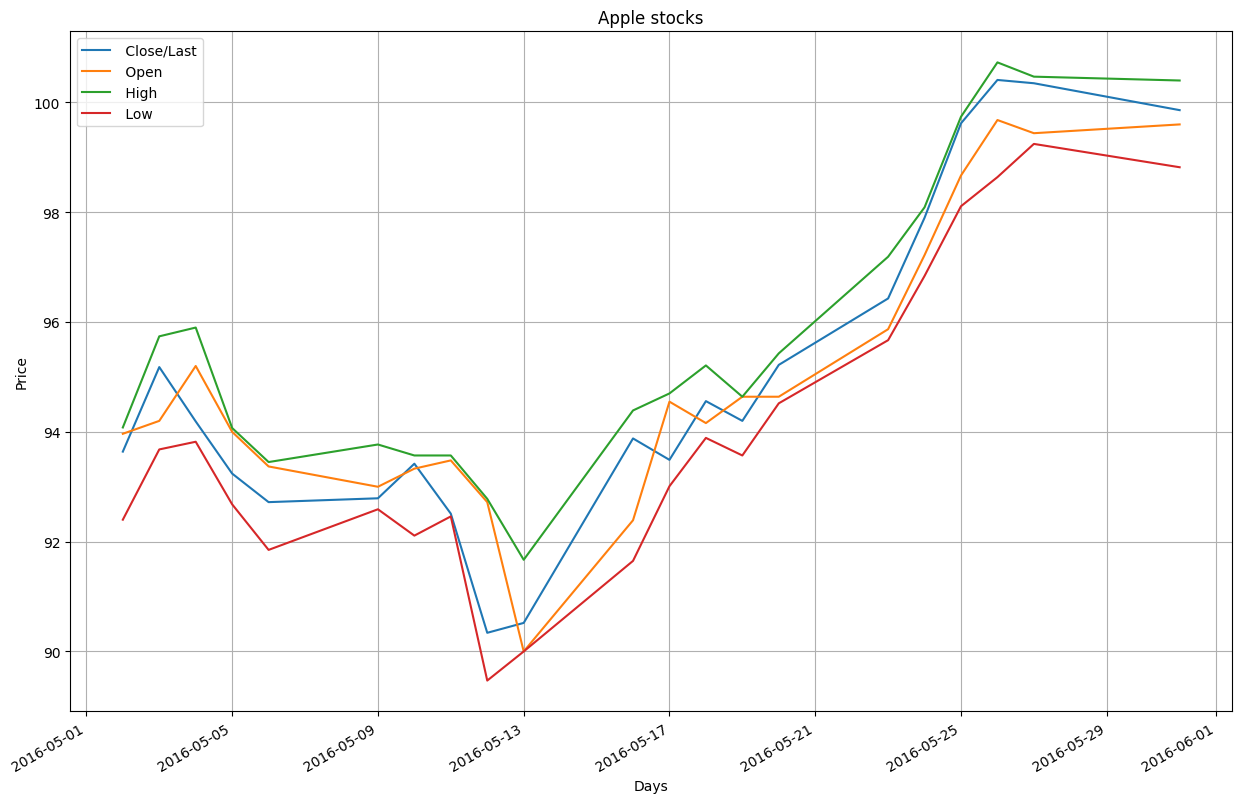

In [ ]:
apple_stock.loc['2016-05'].plot(figsize=(15, 10))
plt.title('Apple stocks')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
## Folosim in mare parte la seriile de timp pentru a vedea daca acestea au sezonalitate, trend, medie si varianta stationara etc...

## Bar plots

In [ ]:
years_stock=apple_stock.resample('YE').mean().round(2) ## acel a vine de la anual

In [ ]:
years_stock.index = years_stock.index.year

In [ ]:
years_stock

,Close/Last,Open,High,Low
Date,,,,
2010,38.56,38.56,38.92,38.11
2011,52.00,52.01,52.49,51.47
2012,82.29,82.38,83.12,81.41
2013,67.52,67.59,68.23,66.89
2014,92.26,92.22,93.01,91.48
2015,120.04,120.17,121.24,118.86
2016,104.60,104.51,105.43,103.69
2017,150.55,150.45,151.41,149.49
2018,189.05,189.11,190.99,187.18


Text(0.5, 0, 'Years')

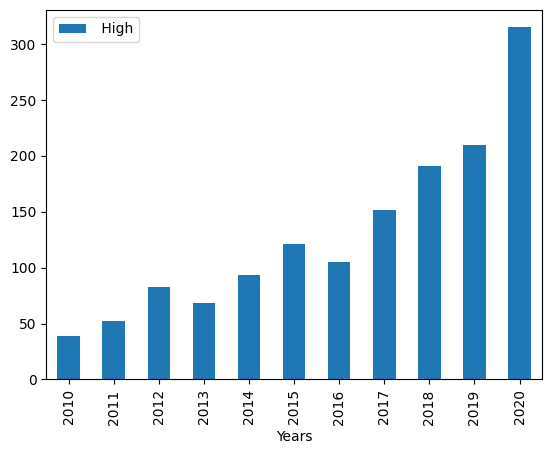

In [ ]:
years_stock.plot(y=' High', kind='bar')
plt.xlabel('Years')

Text(0, 0.5, 'Years')

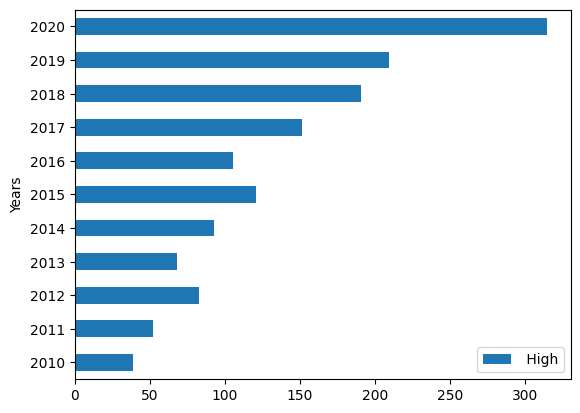

In [ ]:
years_stock.plot(y=' High', kind='barh')
plt.ylabel('Years')

Text(0.5, 0, 'Years')

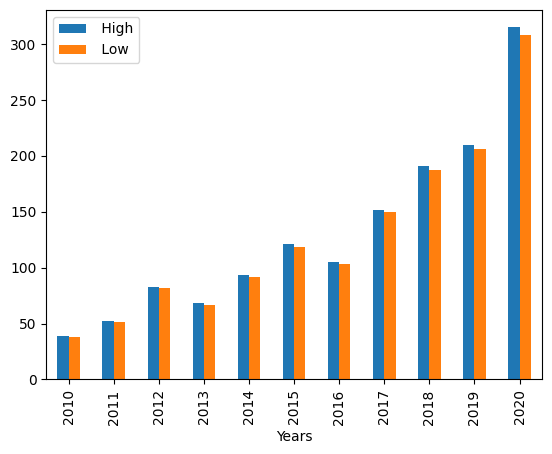

In [ ]:
years_stock.plot(y=[' High', ' Low'], kind='bar')
plt.xlabel('Years')
## Extrem de utile in vizualizarea impalansarii seturilor de date

## Histograms

In [ ]:
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
exams = pd.read_csv(path + '/StudentsPerformance.csv')

100%|██████████| 8.70k/8.70k [00:00<00:00, 7.25MB/s]

Extracting files...


In [ ]:
exams ## Pentru histograma vom folosi doar coloanele numerice -> math score, reading score, writing score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
exams['total'] = exams['math score'] + exams['reading score'] + exams['writing score']

In [ ]:
exams

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


<Axes: ylabel='Frequency'>

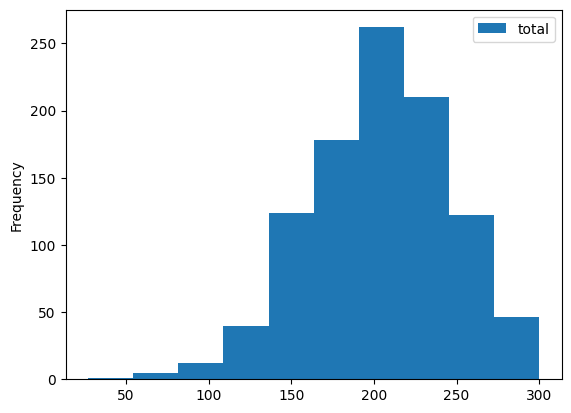

In [ ]:
exams.plot(y='total', kind='hist') ## Ne ofera informatii despre frecventa/distribtia datelor
## Foarte utila cand vom inlocui valorile nule dintr-un dataset

<Axes: ylabel='Frequency'>

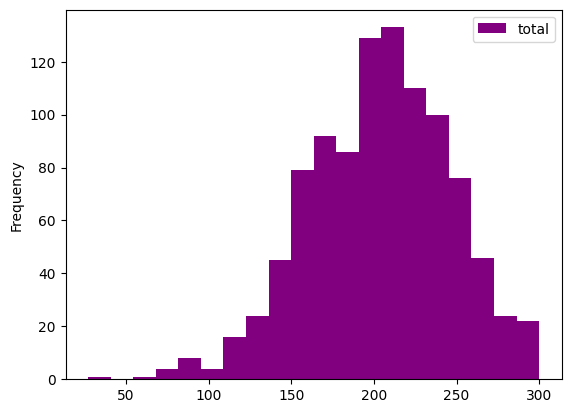

In [ ]:
exams.plot(y='total', kind='hist', bins=20, color='purple')

<Axes: >

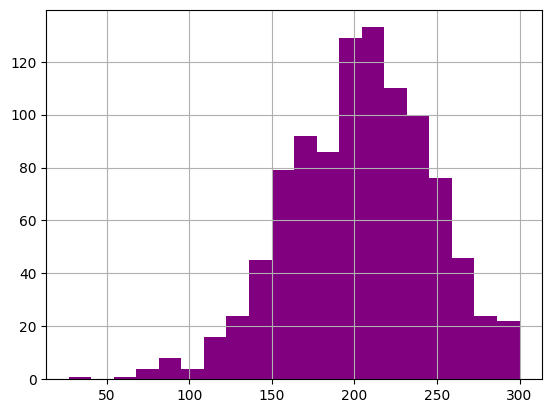

In [ ]:
exams.total.hist(bins=20, color='purple')

## Pie charts

In [ ]:
exams['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [ ]:
educations = exams['parental level of education'].value_counts()

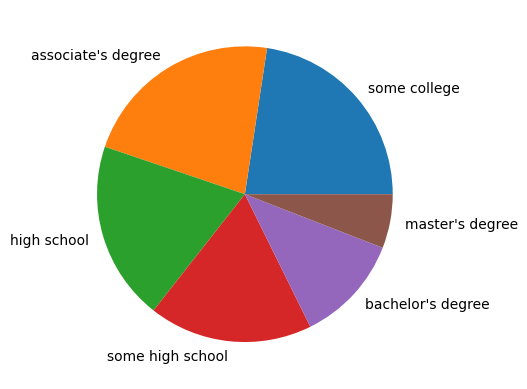

In [ ]:
plt.pie(x=educations.values, labels=educations.index)
plt.show()

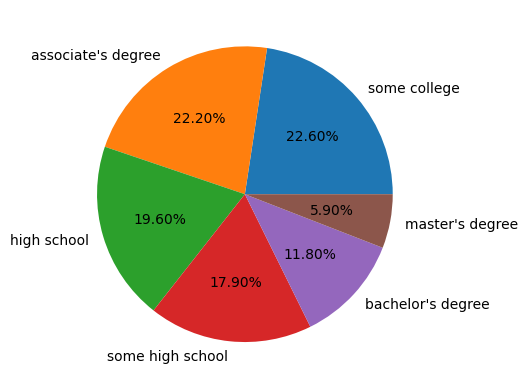

In [ ]:
plt.pie(x=educations.values, labels=educations.index, autopct='%.2f%%')
plt.show() ## Se foloseste in identificarea imbalansarii intre clase la problemele de clasificare, si in vizualizarea distributiei caracteristicilor categorice

## Box plot

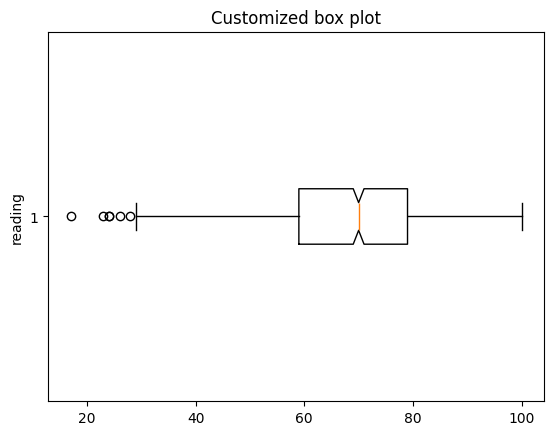

In [ ]:
plt.boxplot(x=exams['reading score'], vert=0, notch=True)
plt.show()

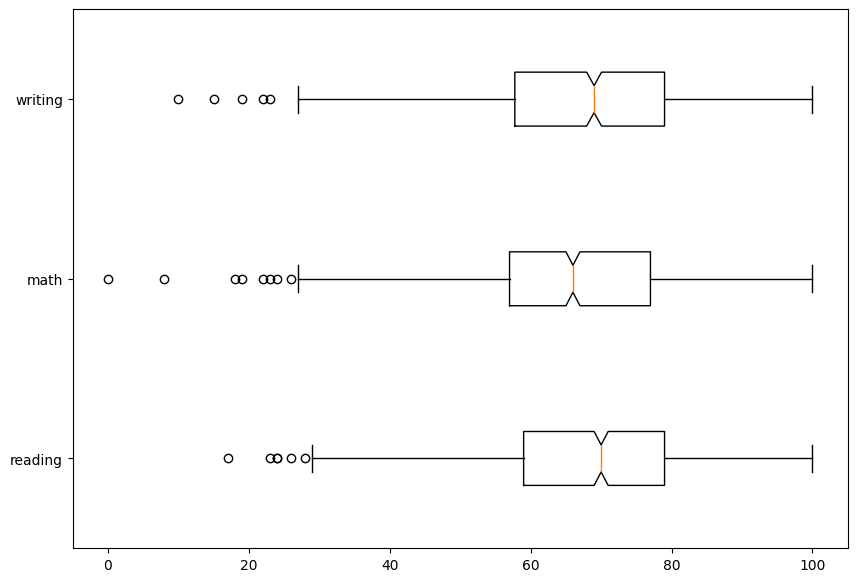

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
data = [exams['reading score'], exams['math score'], exams['writing score']]
bp = ax.boxplot(data, notch ='True', vert = 0)

ax.set_yticklabels(['reading', 'math', 'writing'])

ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.show()
## Foarte util in identificarea outlierelor, a identificarii simetriei datelor,

## Seaborn

In [ ]:
import seaborn as sns

     reading score  math score  writing score
0               72          72             74
1               90          69             88
2               95          90             93
3               57          47             44
4               78          76             75
..             ...         ...            ...
995             99          88             95
996             55          62             55
997             71          59             65
998             78          68             77
999             86          77             86

[1000 rows x 3 columns]
             Grades  Score
0     reading score     72
1     reading score     90
2     reading score     95
3     reading score     57
4     reading score     78
...             ...    ...
2995  writing score     95
2996  writing score     55
2997  writing score     65
2998  writing score     77
2999  writing score     86

[3000 rows x 2 columns]


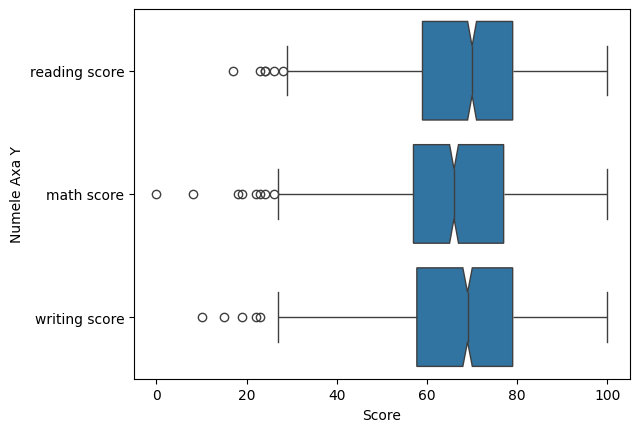

In [ ]:
data = exams[['reading score', 'math score', 'writing score']]

data_melted = data.melt(var_name='Grades', value_name='Score')
print(data)
print(data_melted)

ax = sns.boxplot(x='Score', y='Grades', data=data_melted, orient='h', notch=True)
ax.set_ylabel('Numele Axa Y')
plt.show()

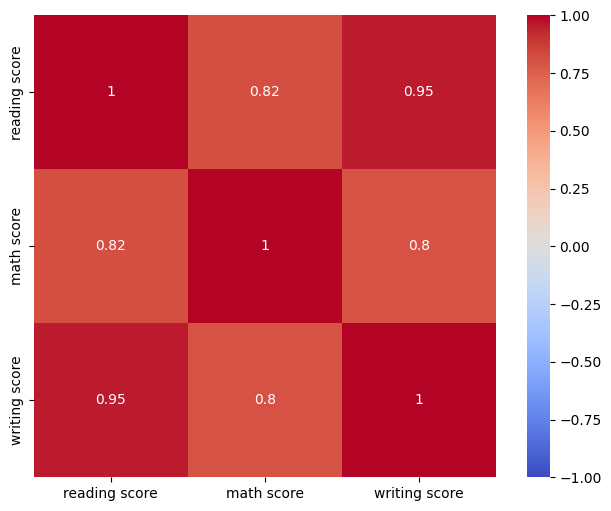

In [ ]:
data = exams[['reading score', 'math score', 'writing score']]

correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.show()
## Corelația este utilă pentru a elimina caracteristicile redundante, deoarece două variabile puternic corelate conțin informație similară.


## Plotly
* Va jucati voi

## Save plots as images

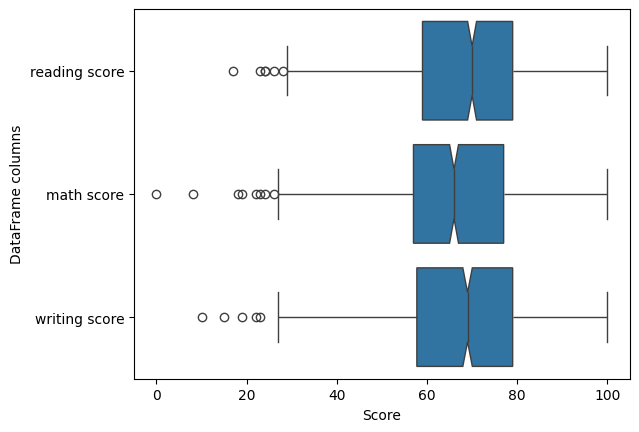

In [ ]:
data = exams[['reading score', 'math score', 'writing score']]

data_melted = data.melt(var_name='Grades', value_name='Score')

ax = sns.boxplot(x='Score', y='Grades', data=data_melted, orient='h', notch=True)
ax.set_ylabel('DataFrame columns')
plt.savefig('boxplot.png', format='png', dpi=300)
plt.show()

## Image normaliation

In [ ]:
import cv2
import numpy as np

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (12.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

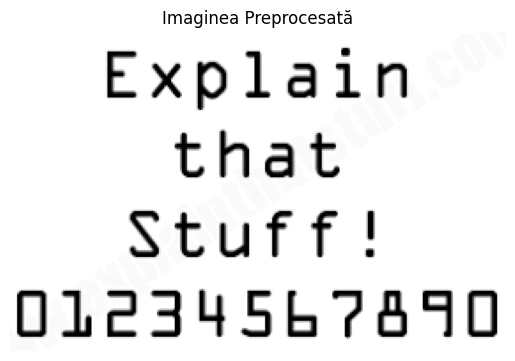

Text extras din imagine:
Explain
that
Stuff!
012345678690



In [ ]:
import pytesseract

img = cv2.imread("example.png")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY, 11, 5)


# Afișăm imaginea preprocesată
plt.imshow(gray, cmap='gray')
plt.show()

# Aplicăm OCR folosind Tesseract pe imaginea preprocesată
text = pytesseract.image_to_string(gray, lang='eng')

# Afișăm textul extras
print(text)

## Delimitarea textului prin casete
## Eliminarea zgomotului
## Extragerea textului doar din casetele annotate
